**Seguimiento 4**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#cargar datos
import os 
ruta=os.getcwd()
archivo=os.listdir(ruta+'/EMG_data_for_gestures-master')
serie1=[] #guardar en matriz tridimensional? para no tener dos series por aparte
serie2=[]
for i in archivo[0:-1]: #ignora el readme
    v=os.listdir(ruta+'/EMG_data_for_gestures-master'+'/'+i)
    #x1=np.loadtxt(ruta+'/EMG_data_for_gestures-master'+'/'+i+'/'+v[0],skiprows=1,delimiter='\t',usecols=range(0,9))
    x2=np.loadtxt(ruta+'/EMG_data_for_gestures-master'+'/'+i+'/'+v[1],skiprows=1,delimiter='\t',usecols=range(0,10))
    #serie1.append(x1)
    serie2.append(x2)
#serie1=np.array(serie1,dtype=object)
#serie2=np.array(serie2,dtype=object)
#serie1[0] -->Serie 1 del primer sujeto y no carga la columna class porque el ultimo dato de la serie 1 del sujeto 34 le falta el valor (creo que es por eso)
#se podría arreglar skipeando también la última fila. o cargando solo los 2 xd

definicion de funciones

In [108]:
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x [0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x

In [92]:
def tkeoall(xdata): #se le entrega la matriz incluyendo la columna del tiempo (no la de class)
    data=xdata[:,1:-1]*1
    tkeoforchannel=np.apply_along_axis(tkeo,0,data)
    return tkeoforchannel #saca un array donde tkeoall(data)[0] es el primer canal

In [14]:
def rms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms

In [15]:
#funcion
def caracteristicas(data): 
    carac_canales=[]
    for i in range(0,np.shape(data)[1]): #tal vez se pueda usar apply_along_axis para calcular todas
        xx=data[:,i]
        xrms=rms(xx) #root mean square
        xvar=np.var(xx) #varianza
        xmav=np.mean(np.abs(data)) #mean absolute value
        xmavs=np.mean(np.abs(np.diff(data))) #mean absolute value slope
        derivative = np.diff(data)
        xssc = np.sum(np.diff(np.sign(derivative)) != 0) #Slope sign changes
        diff_abs = np.abs(np.diff(data))
        xwl = np.sum(diff_abs) #waveform length
        xzc = len(np.where(np.diff(np.sign(data)))[0]) #zero crossings
        carac_canal_actual=[xrms,xvar,xmav,xmavs,xssc,xwl,xzc]
        carac_canales.append(carac_canal_actual)
    return np.array(carac_canales)

tkeo

In [109]:
tkeo_serie2=[]
for i in range(0,np.shape(serie2)[0]):
    tkeo_serie2.append((tkeoall(serie2[i]))) 

c:\Users\WIN 7\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


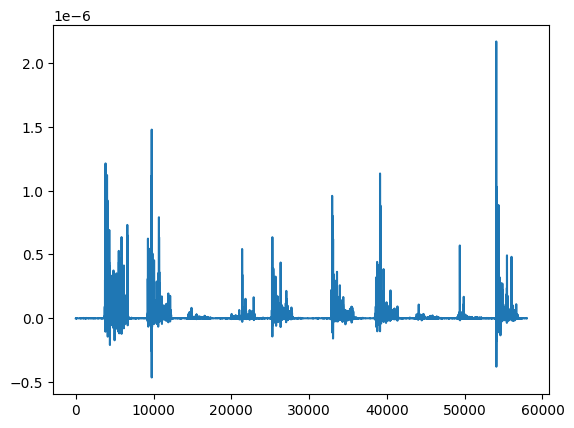

In [97]:
plt.plot(tkeo_serie2[0][:,0])

separacion de movs

In [150]:
#Se separa de la señal con tkeo
movs=[]
for i in range(len(tkeo_serie2)):
    movsxsuj=[]
    for mov in range(7):
        mov_type=tkeo_serie2[i][serie2[i][:,-1]==mov]
        movsxsuj.append(mov_type) #lista con los 7 movs separados por cada sujeto
    movs.append(movsxsuj) #lista con todos los movs por sujeto

In [118]:
movs[0][1].shape

(3531, 8)

In [119]:
#guardar todos los tipos de movs en la misma lista
mov0=[] 
mov1=[]
mov2=[]
mov3=[]
mov4=[]
mov5=[]
mov6=[]
for suj in movs:
    mov0.append(suj[0])
    mov1.append(suj[1])
    mov2.append(suj[2])
    mov3.append(suj[3])
    mov4.append(suj[4])
    mov5.append(suj[5])
    mov6.append(suj[6])

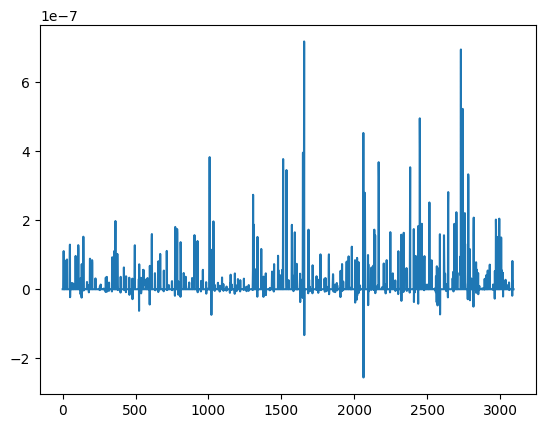

In [152]:
plt.plot(mov3[32][:,5]) #plotear canal 5 del movimiento tipo 3

caracteristicas

In [157]:
mov1[6].shape

(3717, 8)